**MNIST digit recognition using ANN**

In [1]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
#importing MNIST datasets
mnist_data = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist_data.load_data()
x_train,x_test = x_train/255, x_test/255
print("shape of x_train is : ", x_train.shape)
print("shape of x_test is : ", x_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
shape of x_train is :  (60000, 28, 28)
shape of x_test is :  (10000, 28, 28)


In [3]:
#creating the layers and adding those to model

#layers
flat = tf.keras.layers.Flatten(input_shape = (28,28))
l1 = tf.keras.layers.Dense(128, activation = 'relu')
drop = tf.keras.layers.Dropout(0.2)
l2 = tf.keras.layers.Dense(10, activation = 'softmax')

#model
model = tf.keras.models.Sequential([flat, l1, drop, l2])

In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
# Training model
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2978 - accuracy: 0.9138 - val_loss: 0.1394 - val_accuracy: 0.9579
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1430 - accuracy: 0.9578 - val_loss: 0.0988 - val_accuracy: 0.9698
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1074 - accuracy: 0.9674 - val_loss: 0.0876 - val_accuracy: 0.9733
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0866 - accuracy: 0.9732 - val_loss: 0.0748 - val_accuracy: 0.9761
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0728 - accuracy: 0.9768 - val_loss: 0.0759 - val_accuracy: 0.9775
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0645 - accuracy: 0.9796 - val_loss: 0.0750 - val_accuracy: 0.9775
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0565 - accuracy: 0.9819 - val_loss: 0.0731 - val_ac

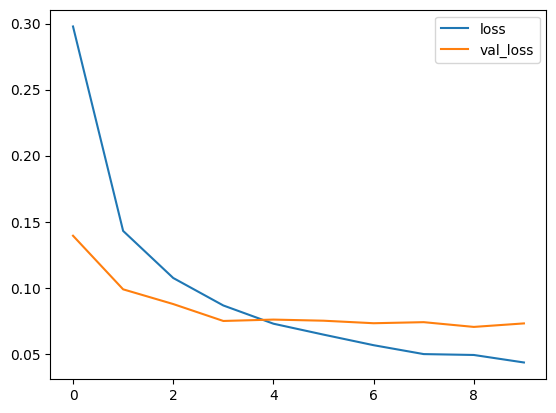

In [6]:
# Plot loss per iteration
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend();

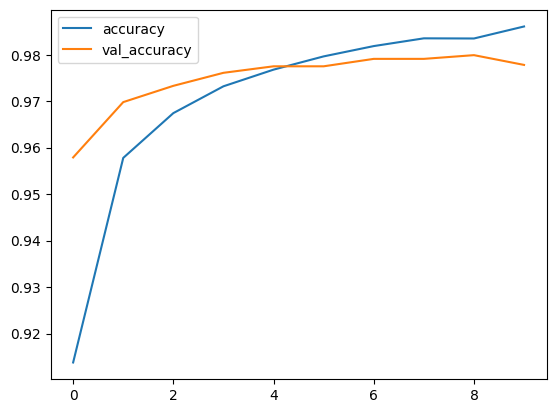

In [7]:
# Plot accuracy
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend();

In [8]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0730 - accuracy: 0.9778
[0.07297668606042862, 0.9778000116348267]


In [9]:
# Printing confusion matrix
def plot_confusion_matrix(cm, classes, normalize = False, cmap = plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    print("Normalised confusion matrix")
  else:
    print("Confusion matrix without normalization")
  print(cm)
  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  # plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt),
             horizontalalignment = 'center',
             color = 'white' if cm[i,j] > thresh else 'black')

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label');

313/313 [==============================] - 1s 2ms/step
Confusion matrix without normalization
[[ 966    0    1    3    2    1    4    0    3    0]
 [   0 1122    4    3    0    0    2    1    3    0]
 [   1    1 1011    4    4    0    2    5    3    1]
 [   0    1    4  996    0    2    0    3    2    2]
 [   0    0    2    0  967    0    5    1    0    7]
 [   1    0    0   15    2  865    1    0    7    1]
 [   3    3    3    1    4    5  938    0    1    0]
 [   0    5   16    5    1    0    0  996    0    5]
 [   5    1    3    9    6    3    1    4  940    2]
 [   1    3    0    7   12    3    1    3    2  977]]


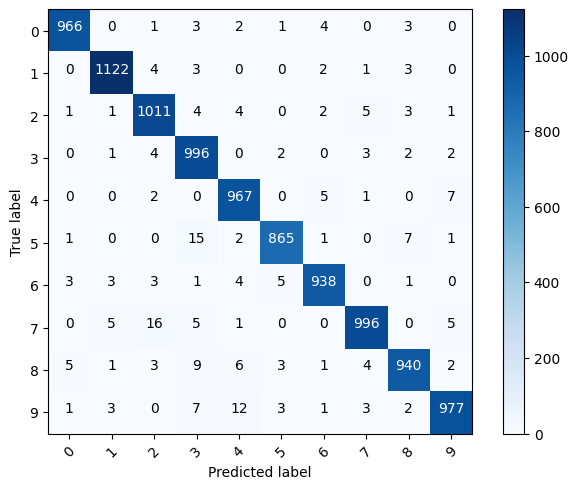

In [10]:
p_test = model.predict(x_test).argmax(axis = 1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True label: 8 predicted: 2')

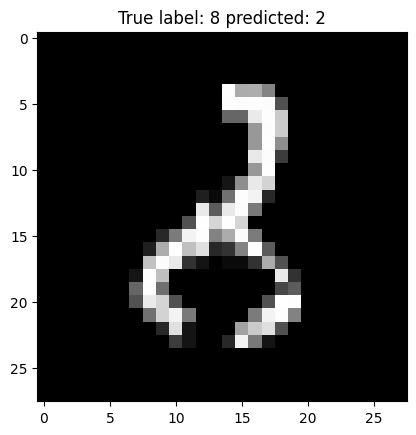

In [20]:
#show the misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap = 'gray')
plt.title("True label: %s predicted: %s" % (y_test[i], p_test[i]))